In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### DATA PREPARATION ###

In [123]:
df =pd.read_csv('Housing_Data.csv')

In [124]:
with open('Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [125]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

### DEALING WITH OUTLIER ###

<AxesSubplot:>

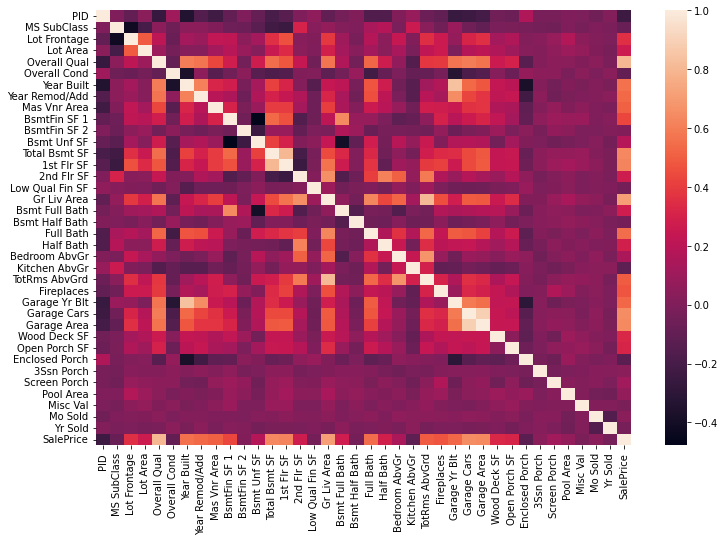

In [127]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [128]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

SalePrice is positively and highly correlated with Overall Qual

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

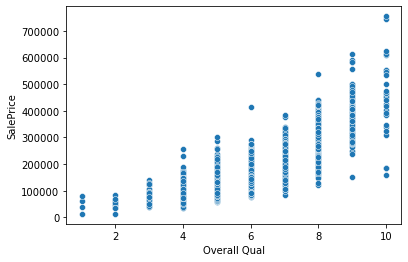

In [129]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)

When the guality goes up the distribution of SalcePrice is wider <br>
When quality gows up the price gows up. There are few points witch drop this trend. <br>

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

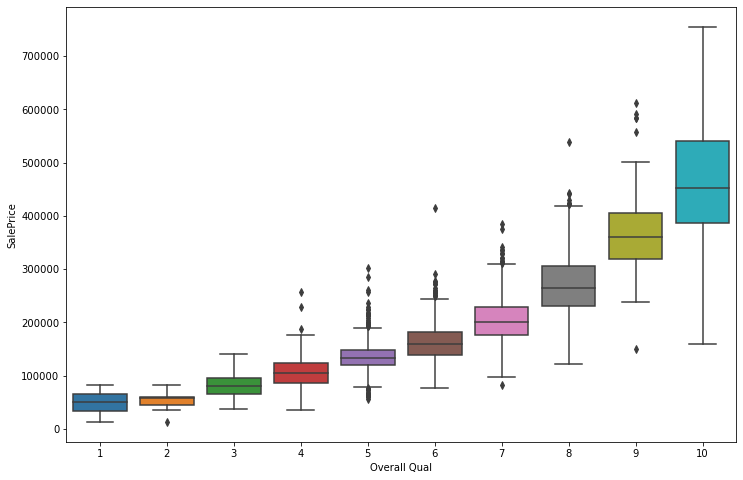

In [130]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Overall Qual', y='SalePrice', data=df)

In [131]:
#Look at 3 points which 
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


C:\Users\Patrycja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

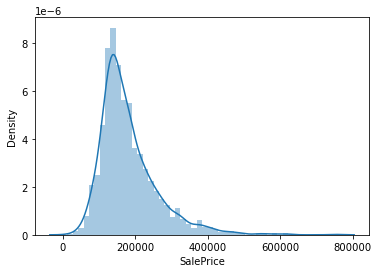

In [132]:
sns.distplot(df['SalePrice'])

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

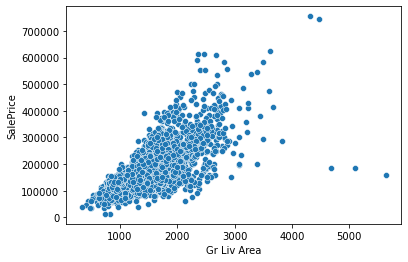

In [133]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

I don't drop the two points (righ up corner), becouse houses with extremly high Gr Liv Area can have extremly high SalePrice and this trend will be catched by linear regression line. It is possible scenario. These points follow by trend. <br>
<br>
There are 3 outliers in the lower right conrner witch don't follow by trend. These points can break the model

In [134]:
#There are 3 outliers in the lower right corner which don't go with regular distribution
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [135]:
index_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index
index_drop 

Int64Index([1498, 2180, 2181], dtype='int64')

This same outliers as in Overall Qual vs SalePrice

In [136]:
df = df.drop(index_drop,axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

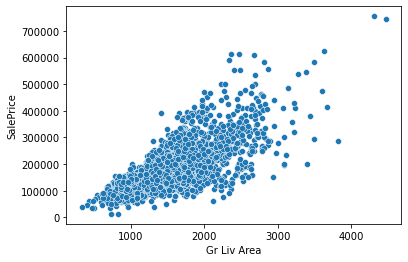

In [137]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

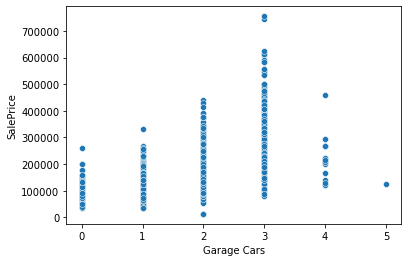

In [138]:
sns.scatterplot(x='Garage Cars',y='SalePrice',data=df)

In [139]:
df.to_csv("Ames_outliers_delated.csv",index=False)

### DEALING WITH MISSING DATA ###

In [140]:
df =pd.read_csv('Ames_outliers_delated.csv')

In [141]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Removing the PID

We  have an index, so we don't need the PID unique identifier.

In [142]:
df = df.drop('PID',axis=1)

In [143]:
len(df.columns)

80

### Identyfication of null observation

In [144]:
df.isnull().sum().sort_values(ascending=False)

Pool QC         2915
Misc Feature    2822
Alley           2729
Fence           2355
Fireplace Qu    1422
                ... 
Heating QC         0
MS Zoning          0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 80, dtype: int64

In [145]:
#Percentage of null value
(df.isnull().sum() * 100/ len(df)).sort_values(ascending=False)

Pool QC         99.590024
Misc Feature    96.412709
Alley           93.235395
Fence           80.457807
Fireplace Qu    48.582166
                  ...    
Heating QC       0.000000
MS Zoning        0.000000
1st Flr SF       0.000000
2nd Flr SF       0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [146]:
def percent_missing(df):
    percent = df.isnull().sum() * 100/ len(df)
    percent = percent[percent>0].sort_values(ascending = False)
    return percent

In [147]:
percent_nan = percent_missing(df)

In [148]:
percent_nan 

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Cond        5.432183
Garage Qual        5.432183
Garage Finish      5.432183
Garage Yr Blt      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
Garage Cars        0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
BsmtFin SF 1       0.034165
Electrical         0.034165
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Pool QC'),
  Text(1, 0, 'Misc Feature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Fireplace Qu'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Garage Cond'),
  Text(7, 0, 'Garage Qual'),
  Text(8, 0, 'Garage Finish'),
  Text(9, 0, 'Garage Yr Blt'),
  Text(10, 0, 'Garage Type'),
  Text(11, 0, 'Bsmt Exposure'),
  Text(12, 0, 'BsmtFin Type 2'),
  Text(13, 0, 'BsmtFin Type 1'),
  Text(14, 0, 'Bsmt Qual'),
  Text(15, 0, 'Bsmt Cond'),
  Text(16, 0, 'Mas Vnr Area'),
  Text(17, 0, 'Mas Vnr Type'),
  Text(18, 0, 'Bsmt Half Bath'),
  Text(19, 0, 'Bsmt Full Bath'),
  Text(20, 0, 'Total Bsmt SF'),
  Text(21, 0, 'Bsmt Unf SF'),
  Text(22, 0, 'Garage Cars'),
  Text(23, 0, 'Garage Area'),
  Text(24, 0, 'BsmtFin SF 2'),
  Text(25, 0, 'BsmtFin SF 1'),
  Text(26, 0, 'Electrical')])

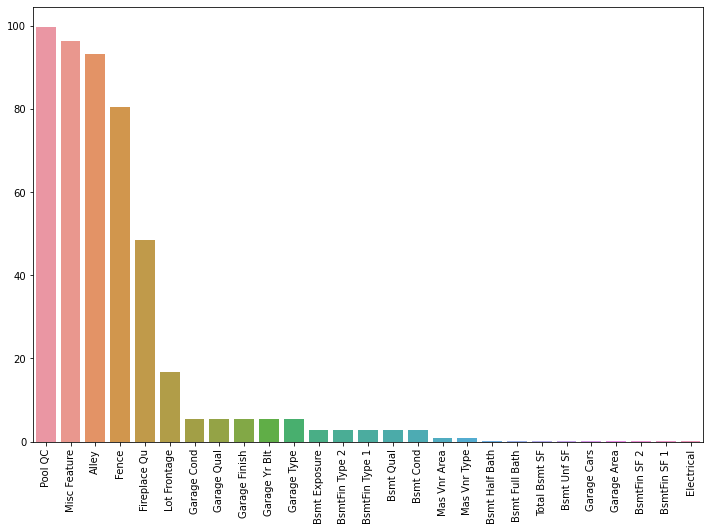

In [149]:
plt.figure(figsize=(12,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

(0.0, 1.0)

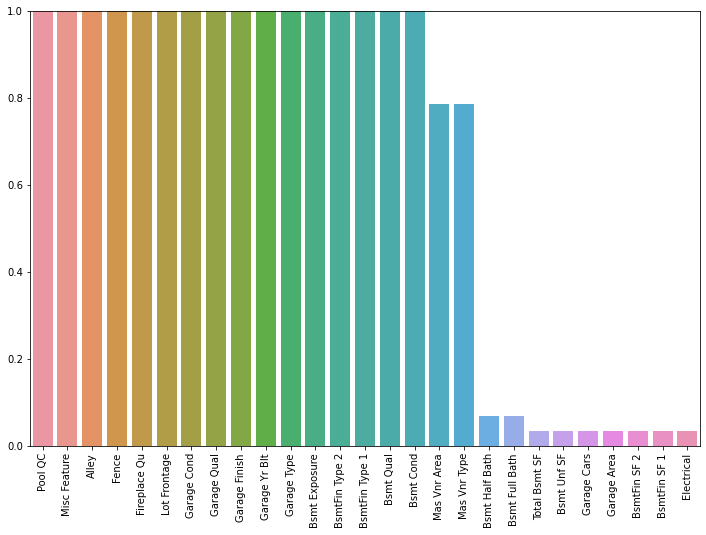

In [150]:
plt.figure(figsize=(12,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

Many of feature have <1% of missing data <br>
Which rows are missing the very small % of data?

In [151]:
percent_nan[percent_nan <1]

Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
Garage Cars       0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
BsmtFin SF 1      0.034165
Electrical        0.034165
dtype: float64

In [152]:
#1 cell with no data what is the percentage of the total?
100/len(df)

0.0341646737273659

There will be few approach  to filling missing data <br>
1. Delete row. If there is only one row with missing data <br>
2. Filling missing value with 0. If a feature is missing (e.g. garage), other attributes related to the garage are missing

In [153]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [154]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


### Filling in data based on column names. There are 2 types of basement features, numerical and string descriptives.

In [155]:
col = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

In [156]:
#According to description of data if there is NA value in Bsmt Qual in means there is NO BASEMENT
df[df[col].isnull()]['Bsmt Qual']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2922    NaN
2923    NaN
2924    NaN
2925    NaN
2926    NaN
Name: Bsmt Qual, Length: 2927, dtype: object

In [157]:
df[df[col].isnull()]['Bsmt Qual'].notnull().sum()

0

It can be assumed that the missing values in attributes related to the basement are due to the lack of a basement <br>

Fill numerical variable with value 0

In [158]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

Fill categorical variable with string "None"

In [159]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

### Dropping Rows
A few of features appear that it is just one or two rows missing the data.

In [160]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [161]:
percent_nan = percent_missing(df)

(0.0, 1.0)

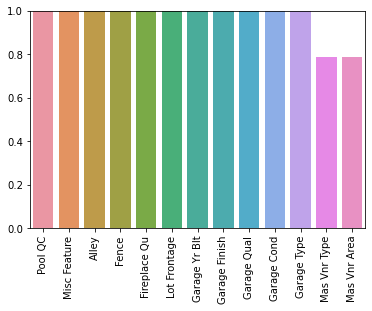

In [162]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

### Mas Vnr Feature 
<br>

Based on the Description of data, Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer.
As previously I will fill NA with 0

In [163]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [164]:
percent_nan = percent_missing(df)

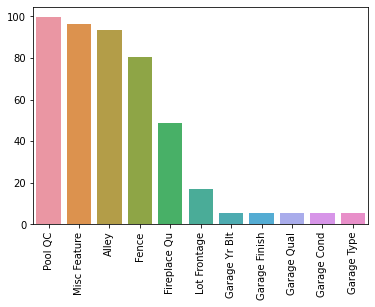

In [165]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## FILLING MISSING  DATA

### Garage Columns

Based on the data description, these NaN seem to indicate no garage, so I will substitute with "None" or 0.

In [166]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2922,Detchd,Unf,TA,TA
2923,Attchd,Unf,TA,TA
2924,NaN,NaN,NaN,NaN
2925,Attchd,RFn,TA,TA


In [167]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [168]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [169]:
percent_nan = percent_missing(df)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Pool QC'),
  Text(1, 0, 'Misc Feature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Fireplace Qu'),
  Text(5, 0, 'Lot Frontage')])

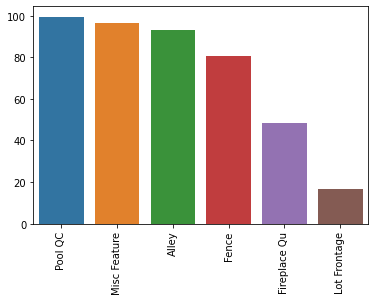

In [170]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

## Dropping Feature Columns

If 99% of rows are missing a feature, it will not be predictive, since almost all the data does not have any value for it. 

In [171]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [172]:
percent_nan = percent_missing(df)

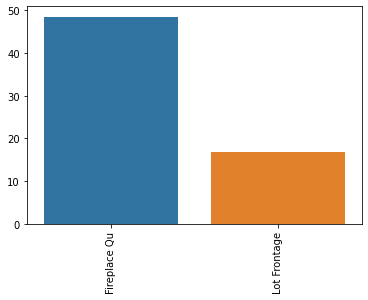

In [173]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Filling in Fireplace Quality based on Description Text

NA	= No Fireplace

In [174]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [175]:
percent_nan = percent_missing(df)

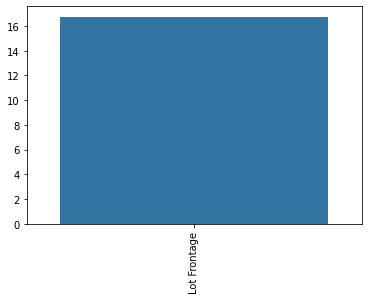

In [176]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Imputation of Missing Data


Is there any variable correlated with Lot Frontage? <br>
Can I use statistic of another column to fill Lot Frontage? <br>

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

In [177]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

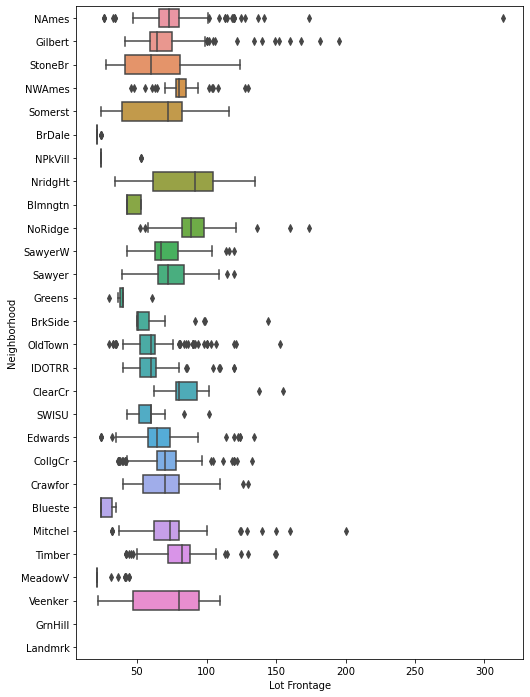

In [178]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [179]:
df.groupby('Neighborhood')['Lot Frontage']

In [180]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [181]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2922     37.000000
2923     75.144444
2924     62.000000
2925     77.000000
2926     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [182]:
df.iloc[21:26]['Lot Frontage']

21    85.0
22     NaN
23     NaN
24     NaN
25    65.0
Name: Lot Frontage, dtype: float64

In [183]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean())).iloc[21:26]

21    85.000000
22    64.549383
23    75.210667
24    75.210667
25    65.000000
Name: Lot Frontage, dtype: float64

In [184]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [185]:
percent_nan = percent_missing(df)

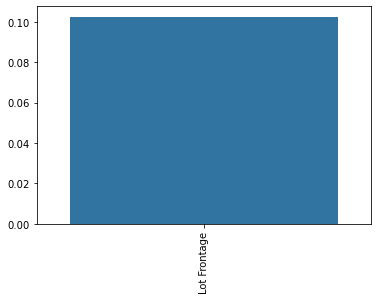

In [186]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [187]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [188]:
percent_nan = percent_missing(df)

In [189]:
percent_nan

Series([], dtype: float64)

In [ ]:
df.to_csv("Housing_NO_Missing_Data.csv",index=False)